## CNN 

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.preprocessing import image 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from tensorflow.image import rgb_to_grayscale
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow as tf

In [2]:
def get_image_value(path): 
    img = image.load_img(path, target_size = (48,48,3))
    img = image.img_to_array(img)
    return img/255

In [3]:
def get_conv_model_normal():
    
    inp_shape = (48,48,3)
    act = 'relu'
    drop = .5 
    kernal_reg = regularizers.l1(.001)
    dil_rate = 2
    
    
    model = Sequential() 
    
    model.add(Conv2D(64, kernel_size=(3,3),activation=act, input_shape = inp_shape, 
                     kernel_regularizer = kernal_reg,
                     kernel_initializer = 'he_uniform',  padding = 'same', name = 'Input_Layer'))
    model.add(Dense(64, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),  strides = (2,2)))
    
    
    model.add(Conv2D(64, (3, 3), activation=act, kernel_regularizer = kernal_reg, dilation_rate = dil_rate, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(Dense(64, activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
    

    
    model.add(Conv2D(128, (3, 3), activation=act, kernel_regularizer = kernal_reg, dilation_rate = dil_rate, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(Conv2D(128, (3, 3), activation=act, kernel_regularizer = kernal_reg, dilation_rate = dil_rate, 
                     kernel_initializer = 'he_uniform',padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

    
    model.add(Flatten())

    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))


    model.add(Dropout(drop))

    model.add(Dense(1, activation='sigmoid', name = 'Output_Layer'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model 


In [4]:
train_type = 'Normal'

def get_samples_norm(train_type): 
    x_train = pickle.load(open(f'pickles/{train_type}_x_train.p', 'rb'))
    x_test = pickle.load(open(f'pickles/Normal_x_test.p', 'rb'))
    y_train = pickle.load(open(f'pickles/{train_type}_y_train.p', 'rb'))
    y_test = pickle.load(open(f'pickles/Normal_y_test.p', 'rb'))
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = get_samples_norm(train_type)
if train_type == 'SMOTE':
    x_train = x_train.reshape(len(x_train), 28, 28, 3) #reshape from smote 

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
augmentation =ImageDataGenerator(rotation_range = 15, width_shift_range = .1, height_shift_range = .1, 
                                                           horizontal_flip = True, fill_mode = 'nearest')
augmentation.fit(x_train)


early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=5, min_delta = .002)
model_checkpoint = ModelCheckpoint('models/CNN-ModelCheckpointWeights.h5', verbose = 1, save_best_only=True,
                                  monitor = 'val_loss', min_delta = .002)
lr_plat = ReduceLROnPlateau(patience = 3, mode = 'min')
epochs = 50
batch_size = 32
normal_model = get_conv_model_normal()
normal_history = normal_model.fit(augmentation.flow(x_train, y_train, batch_size = batch_size),
                epochs = epochs, 
         callbacks = [early_stopping, model_checkpoint, lr_plat], validation_data = (x_test, y_test), verbose= 1)


Epoch 1/50
173/173 [==============================] - ETA: 0s - loss: 3.3694 - accuracy: 0.9248
Epoch 00001: val_loss improved from inf to 0.76742, saving model to models/CNN-ModelCheckpointWeights.h5
173/173 [==============================] - 24s 140ms/step - loss: 3.3694 - accuracy: 0.9248 - val_loss: 0.7674 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 2/50
173/173 [==============================] - ETA: 0s - loss: 0.6106 - accuracy: 0.9539
Epoch 00002: val_loss improved from 0.76742 to 0.45316, saving model to models/CNN-ModelCheckpointWeights.h5
173/173 [==============================] - 24s 138ms/step - loss: 0.6106 - accuracy: 0.9539 - val_loss: 0.4532 - val_accuracy: 0.9671 - lr: 0.0010
Epoch 3/50
173/173 [==============================] - ETA: 0s - loss: 0.4303 - accuracy: 0.9559
Epoch 00003: val_loss improved from 0.45316 to 0.34429, saving model to models/CNN-ModelCheckpointWeights.h5
173/173 [==============================] - 23s 134ms/step - loss: 0.4303 - accuracy: 0.9559 - v

173/173 [==============================] - ETA: 0s - loss: 0.1259 - accuracy: 0.9795
Epoch 00025: val_loss improved from 0.11210 to 0.10997, saving model to models/CNN-ModelCheckpointWeights.h5
173/173 [==============================] - 24s 139ms/step - loss: 0.1259 - accuracy: 0.9795 - val_loss: 0.1100 - val_accuracy: 0.9846 - lr: 0.0010
Epoch 26/50
173/173 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.9811
Epoch 00026: val_loss did not improve from 0.10997
173/173 [==============================] - 24s 136ms/step - loss: 0.1272 - accuracy: 0.9811 - val_loss: 0.1140 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 27/50
173/173 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.9802
Epoch 00027: val_loss did not improve from 0.10997
173/173 [==============================] - 24s 136ms/step - loss: 0.1270 - accuracy: 0.9802 - val_loss: 0.1230 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 28/50
173/173 [==============================] - ETA: 0s - loss

In [13]:
print(normal_model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Conv2D)         (None, 48, 48, 64)        1792      
_________________________________________________________________
dense_20 (Dense)             (None, 48, 48, 64)        4160      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
dense_21 (Dense)             (None, 24, 24, 64)        4160      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 128)      

## Loss & Accuracy

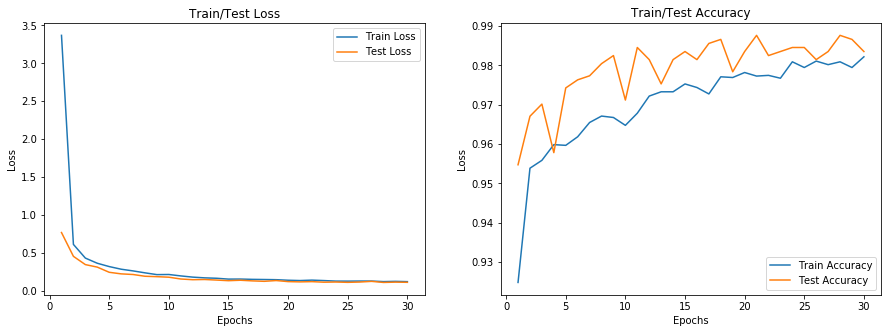

In [7]:
train_loss = normal_history.history['loss']
train_acc = normal_history.history['accuracy']
test_loss = normal_history.history['val_loss']
test_acc = normal_history.history['val_accuracy']
epochs = [i for i in range(1, len(test_acc)+1)]

fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(epochs, train_loss, label = 'Train Loss')
ax[0].plot(epochs, test_loss, label = 'Test Loss')
ax[0].set_title('Train/Test Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(epochs, train_acc, label = 'Train Accuracy')
ax[1].plot(epochs, test_acc, label = 'Test Accuracy')
ax[1].set_title('Train/Test Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

### AUC and ROC Curves

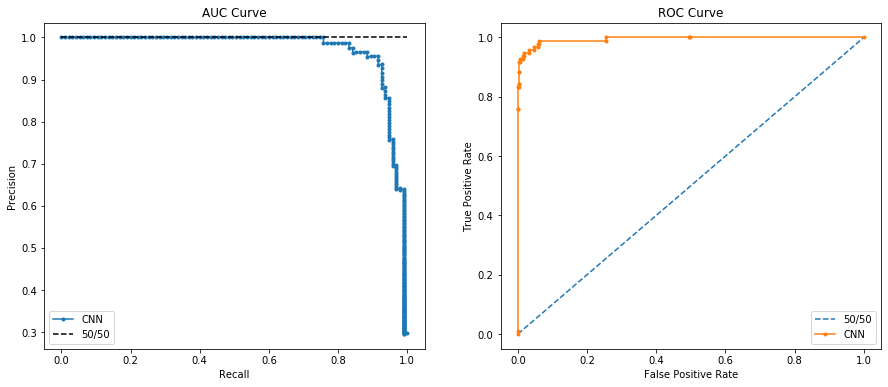

F1 Score    AUC    ROC
0     0.935  0.972  0.994

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, auc
normal_model = get_conv_model_normal()
normal_model.load_weights('models/CNN-ModelCheckpointWeights.h5') #load the best weights before overfitting
 

fig, ax = plt.subplots(1,2, figsize = (15,6))
#AUC CURVE
y_test_prob = normal_model.predict(x_test)

y_test_precision, y_test_recall, spec = precision_recall_curve(y_test, y_test_prob)
y_test_predict = np.where(y_test_prob >= .5, 1, 0).ravel()
y_test_f1= f1_score(y_test, y_test_predict)
y_test_auc = auc(y_test_recall, y_test_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
ax[0].plot(y_test_recall, y_test_precision, marker='.', label='CNN')
ax[0].plot([0, 1], [no_skill, no_skill], linestyle='--', label='50/50', color = 'Black')
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title(f'AUC Curve')
ax[0].legend()

#ROC CURVE
ns_probs = [0 for i in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
y_test_roc = roc_auc_score(y_test, y_test_prob)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
y_test_fpr, y_test_tpr, threshold = roc_curve(y_test, y_test_prob)
ax[1].plot(ns_fpr, ns_tpr, linestyle='--', label='50/50')
ax[1].plot(y_test_fpr, y_test_tpr, marker='.', label='CNN')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title(f'ROC Curve')
ax[1].legend()
plt.show()

pd.DataFrame({'F1 Score': round(y_test_f1, 3), 'AUC': round(y_test_auc, 3), 'ROC':round(y_test_roc, 3)}, index = [0])

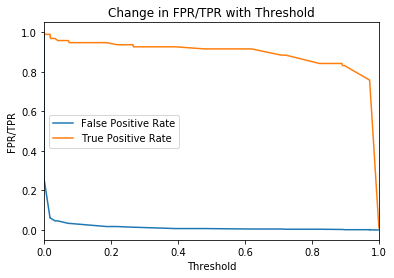

In [9]:
df = pd.DataFrame({'Threshold': threshold, 'FPR': y_test_fpr, 'TPR': y_test_tpr})
plt.plot(df.Threshold, df.FPR, label = 'False Positive Rate')
plt.plot(df.Threshold, df.TPR, label = 'True Positive Rate')
plt.xlabel('Threshold')
plt.ylabel('FPR/TPR')
plt.title('Change in FPR/TPR with Threshold')
plt.xlim(0, 1)
plt.legend()
plt.show()

### Confusion Matrix

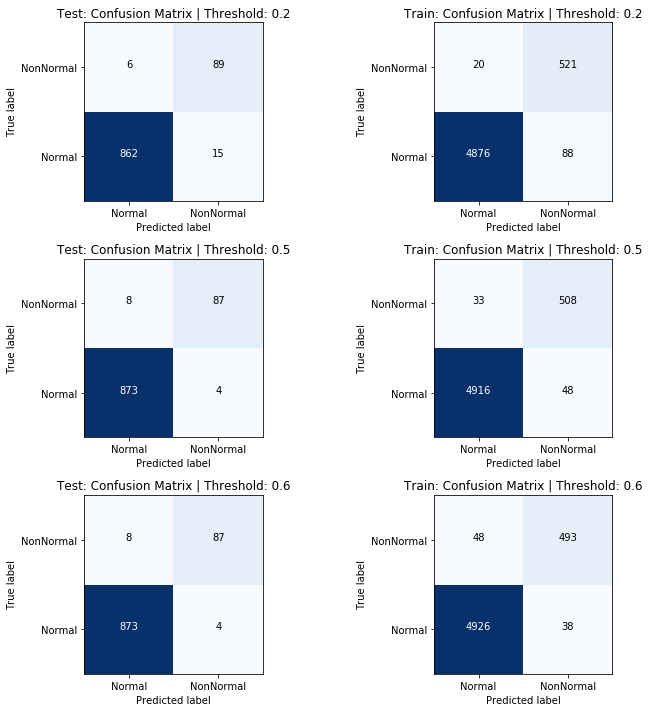

In [10]:
import itertools
import seaborn as sns
def plot_confusion_matrix(y_test,y_train, y_train_prob, y_test_prob,thresholds, classes,
                          cmap=plt.cm.Blues):
    fig, ax = plt.subplots(len(thresholds),2, figsize = (10,10))

    for idx, thresh in enumerate(thresholds):
        y_test_predict = np.where(y_test_prob >= thresh, 1, 0)
        y_train_predict = np.where(y_train_prob >= thresh, 1, 0)
        train_cm = confusion_matrix(y_train, y_train_predict) 
        test_cm = confusion_matrix(y_test, y_test_predict)
        
        #test confusion
        ax[idx, 0].imshow(test_cm,  cmap=plt.cm.Blues) 

        ax[idx, 0].set_title(f'Test: Confusion Matrix | Threshold: {thresh}')
        ax[idx, 0].set_ylabel('True label')
        ax[idx, 0].set_xlabel('Predicted label')

        class_names = classes 
        tick_marks = np.arange(len(class_names))
        ax[idx, 0].set_xticks(tick_marks)
        ax[idx,0].set_xticklabels(class_names)
        ax[idx, 0].set_yticks(tick_marks)
        ax[idx, 0].set_yticklabels(class_names)

        th = test_cm.max() / 2. 

        for i, j in itertools.product(range(test_cm.shape[0]), range(test_cm.shape[1])):
                ax[idx, 0].text(j, i, f'{test_cm[i, j]}',# | {int(round(test_cm[i,j]/test_cm.ravel().sum(),5)*100)}%',
                         horizontalalignment='center',
                         color='white' if test_cm[i, j] > th else 'black')
        ax[idx, 0].set_ylim([-.5,1.5])
        
        #TRAIN CONFUSION
        ax[idx, 1].imshow(train_cm,  cmap=plt.cm.Blues) 

        ax[idx, 1].set_title(f'Train: Confusion Matrix | Threshold: {thresh}')
        ax[idx, 1].set_ylabel('True label')
        ax[idx, 1].set_xlabel('Predicted label')

        class_names = classes 
        tick_marks = np.arange(len(class_names))
        ax[idx, 1].set_xticks(tick_marks)
        ax[idx,1].set_xticklabels(class_names)
        ax[idx, 1].set_yticks(tick_marks)
        ax[idx, 1].set_yticklabels(class_names)


        th = train_cm.max() / 2. 

        for i, j in itertools.product(range(train_cm.shape[0]), range(train_cm.shape[1])):
                ax[idx, 1].text(j, i, f'{train_cm[i, j]}',# | {int(round(train_cm[i,j]/train_cm.ravel().sum(),5)*100)}%',
                         horizontalalignment='center',
                         color='white' if train_cm[i, j] > th else 'black')
        ax[idx, 1].set_ylim([-.5,1.5])
    plt.tight_layout()
 
    plt.show()
    
normal_model = get_conv_model_normal()
normal_model.load_weights('models/CNN-ModelCheckpointWeights.h5') #load the best weights before overfitting

y_test_prob = normal_model.predict(x_test).ravel()

y_train_prob = normal_model.predict(x_train).ravel()

plot_confusion_matrix(y_train = y_train, y_test = y_test, y_train_prob = y_train_prob,
                      y_test_prob = y_test_prob,classes = ['Normal', 'NonNormal'], thresholds = [.2, .5,.6])

## Test Model
- select any picture from google and put it in the TestImages directory, then replace the path below with that of the new picture. 

In [12]:
threshold = .65
normal_model = get_conv_model_normal()
normal_model.load_weights('models/CNN-ModelCheckpointWeights.h5') # load the best weights

for pic in os.listdir('TestImages'):
    if pic == '.DS_Store' or pic == '.ipynb_checkpoints': 
        continue
    tester_img = get_image_value(f'TestImages/{pic}') 


    tester_img = np.reshape(tester_img, (1,48,48,3))
    normal_predict = normal_model.predict(tester_img).squeeze()
    if normal_predict < threshold: 
        print(f'Actual: {pic}\t\tPrediction: Normal\t\tProbability: {normal_predict}')
    else: 
        print(f'Actual: {pic}\t\tPrediction: Non-Normal\t\tProbability: {normal_predict}')



Actual: Bacterial.jpg		Prediction: Non-Normal		Probability: 0.9997383952140808
Actual: Bacterial1.jpg		Prediction: Non-Normal		Probability: 0.9929044842720032
Actual: COVID.jpg		Prediction: Non-Normal		Probability: 0.9901609420776367
Actual: COVID2.jpg		Prediction: Non-Normal		Probability: 0.9997894167900085
Actual: Fungal.jpg		Prediction: Non-Normal		Probability: 0.9992582201957703
Actual: NonNormal.jpg		Prediction: Non-Normal		Probability: 0.9822591543197632
Actual: NonNormal1.jpg		Prediction: Non-Normal		Probability: 0.6621283888816833
Actual: NonNormal2.jpg		Prediction: Non-Normal		Probability: 0.9984496831893921
Actual: Normal.jpg		Prediction: Non-Normal		Probability: 0.9114200472831726
Actual: Normal1.jpg		Prediction: Normal		Probability: 0.17380307614803314
Actual: Normal2.jpg		Prediction: Non-Normal		Probability: 0.998865008354187
Actual: normal3.jpg		Prediction: Normal		Probability: 0.2062779664993286
Actual: Normal4.jpg		Prediction: Non-Normal		Probability: 0.9849247336387634